# An Introduction to Copula Modelling

## Sklar's Theorem

Every multivariate cumulative distribution function can be expressed using only the marginals.

<p style= "text-align:center"> $H(x_1, ..., x_d) = P[X_1 \leq x_1, ..., X_d \leq x_d]$</p>

A random vector $(X_1, X_2, ..., X_d)$ can be expressed using only the marginals:

<p style="text-align:center"> $F_i(x) = P[X_i \leq x]$</p>

<p style="text-align:center"> $H(x_1, ..., x_d) = C[F_i(x_1, ..., F_d(x_d)]$</p>

<p style="text-align:center"> $f(x_1, ..., x_d) = c[(F_1)x_1, ..., F_d(x_d)] * f_1(x_1), ..., f_d(x_d)$</p>

$C=$ copula

$f=$ density function

$c=$ density of the copula

## Copula used in Risk Management

- The 2008/2009 global crisis is said to have been driven by the extensive use of Gaussian copulas that did not correctly calculate the collapse of the financial systems. (**GAUSSIAN COPULAS cannot adequately model the complex dependences in a portfolio.**)

**a. Periods of upward movement:** Investors tend to buy risky assets (equities, derivatives, real estate)

**b. Periods of financial crisis:** Investors tend to buy safer assets (cash or bonds - Flight to quality effect)

**Equities:** tend to be more correlated during a downward movement of the market compared to an upward movement. (Characteristics of a Clayton Copula)

- **Negative News:** have a more significant impact on stock prices as compared to positive news.

Copulas can be used to perform stress-tests and robustness chekcs during periods of financial crisis / downward movement / panic.

Correlation cannot tell us the entire story behind asset interactions therefore copulas can provide better information about the dependencies of the assets.

**Elliptical Dependencies:** Gaussian and T-Copula, they do not allow for correlation asymmetries where correlations differ on the upside or downside regime.

**Vine Copula (pair copula):** allow us to model the dependencies in large dimension portfolios.

**Panic Copula:** estimated by Monte Carlo Simulation quantifies the effect of panic in financial markets on portfolio losses.

**CDOs:** Copulas are used on a large scale to model Collateralized Debt Obligation.

## Scatterplots of random draws from some standard copulas

**Purpose:** to study the type of relationships generated by normal and t-copulas. For each, we generate random bivariate draws from the copula and consider their scatterplots to evaluate the dependence.


## 1. Normal Copula

### with $\rho = 0$

In [2]:
library(copula)
# The term in the brackets is the correlation rho
norm.cop <- normalCopula(0.0)
u0 = rCopula(200, norm.cop)
norm.cop
head(u0)

Normal copula, dim. d = 2 
Dimension:  2 
Parameters:
  rho.1   = 0

0.3867921,0.7761281
0.4341870,0.3440375
0.1808656,0.8701844
0.6808395,0.7773054
0.9353956,0.3224036
0.6250585,0.2212614


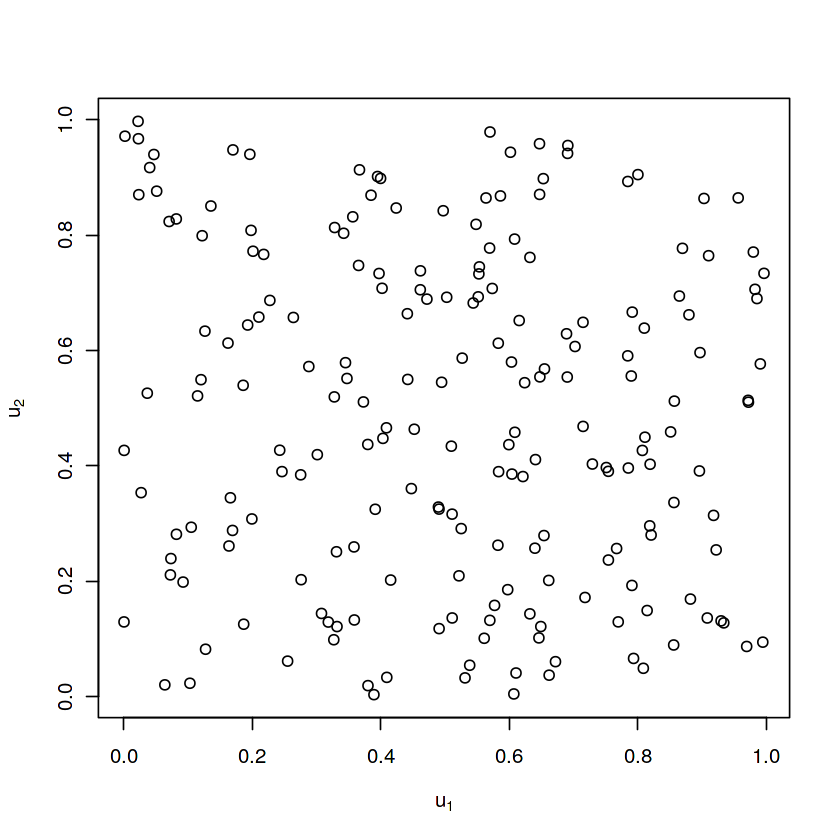

In [3]:
plot(u0, xlab=expression(u[1]), ylab=expression(u[2]))

Given there is no correlation in this normal copula, the random draws are unrelated and uniform and seem to fill the unit square with no evident relationship.

### with $\rho = 0.5$

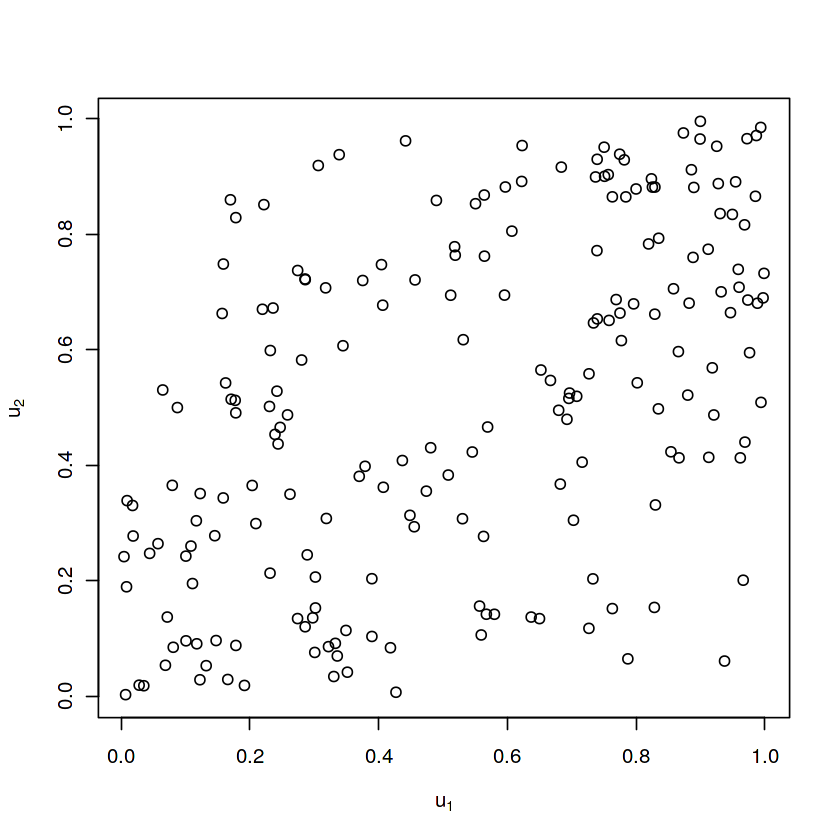

In [4]:
norm.cop <- normalCopula(0.5)
u0 <- rCopula(200, norm.cop)
plot(u0, xlab=expression(u[1]), ylab=expression(u[2]))

Using a correlation of 0.5, we begin to see a positive dependency.
N.B. each $U$ is still individually uniformly distributed, jointly, the points are closer to the positive diagonal.

### with $\rho = -0.95$

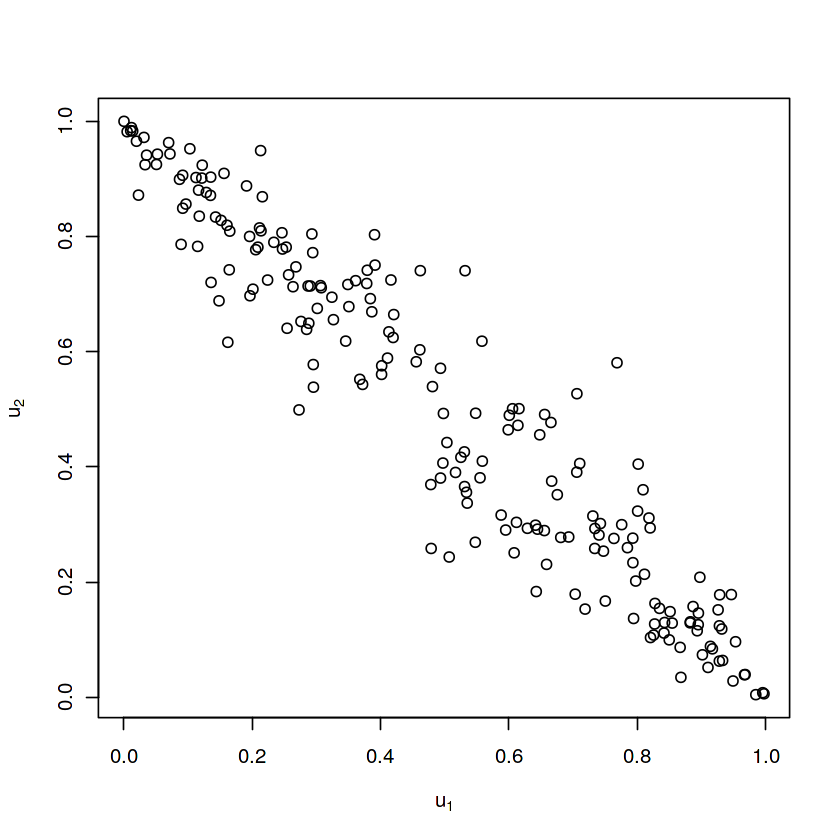

In [6]:
norm.cop <- normalCopula(-0.95)
u0 <- rCopula(200, norm.cop)
plot(u0, xlab = expression(u[1]), ylab = expression(u[2]))

When we usa a normal copula with a strong negative corerlation we see that there is a clear negative tendency, i.e. the points are clustered around the negative diagonal. We can also see the elliptical nature of the distribution: both extreme ends of the distribution suggest tail dependencies: when $u_1$ is very low, $u_2$ tends to be very high and viceversa.

## 2. T-Copula 

In the T-Copula, we want to show the impact of the degree of freedom/tail index, so we do two draws with same high correlation but very fat tail index.

### 100 Degrees of Freedom

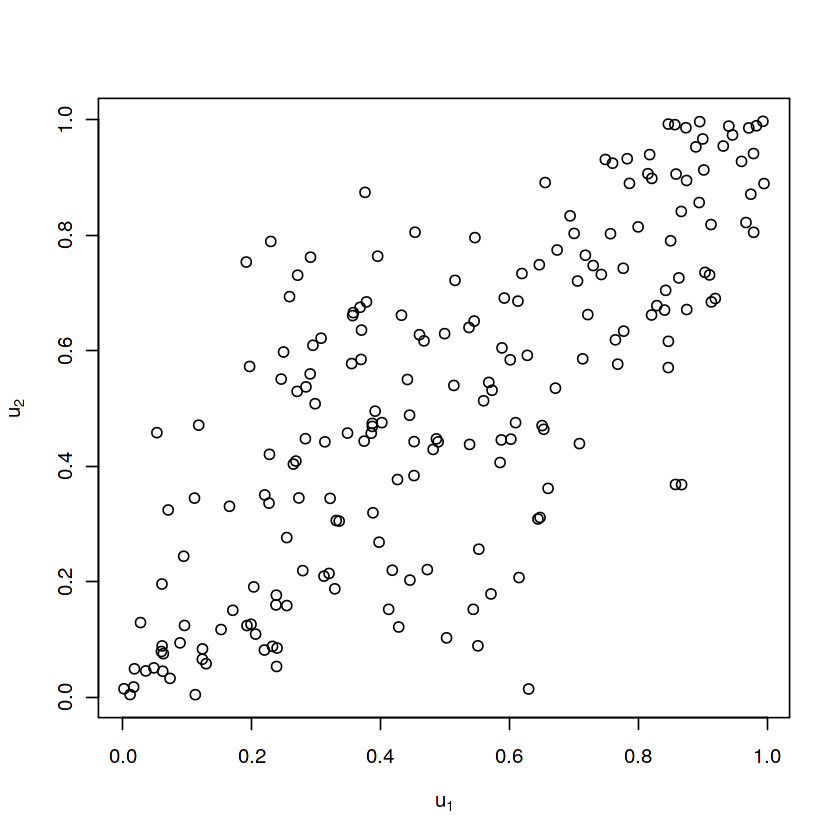

In [7]:
t.cop <- tCopula(0.8, df = 100)
v <- rCopula(200, t.cop)
plot(v, xlab=expression(u[1]), ylab = expression(u[2]))

When the tail index is high we get a picture similar to the normal distribution. There is a clear positive dependence but the tails are not particularly extremely closely clustered. We can also still see the elliptical nature of the distribution.

### 1 Degree of Freedom

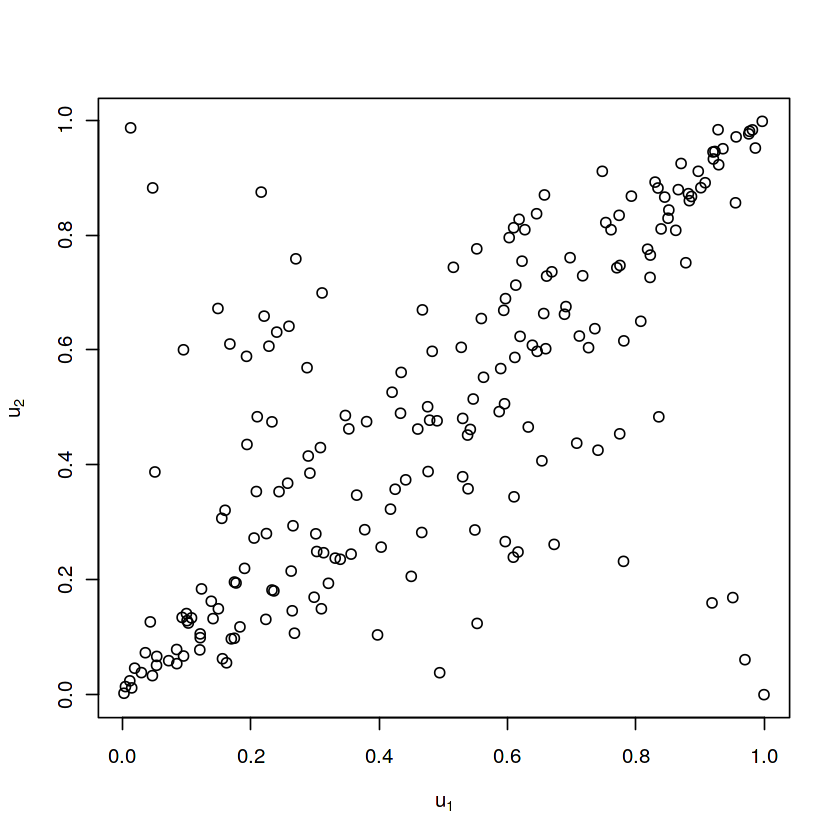

In [8]:
t.cop <- tCopula(0.8, df = 1)
v <- rCopula(200, t.cop)
plot(v, xlab = expression(u[1]), ylab = expression(u[2]))

When the tail index is very low we see strong clustering at both tails even though some points are shooting upwards and downwards from the diagonal.

**Type of Assets for T-Copula:**

This is a good fit for two assets that sometimes have strong tail dependencies but not always.

## 3. Clayton Copula

Varying the $\theta$ parameter we can show how this distribution changes

### $\theta = 2$

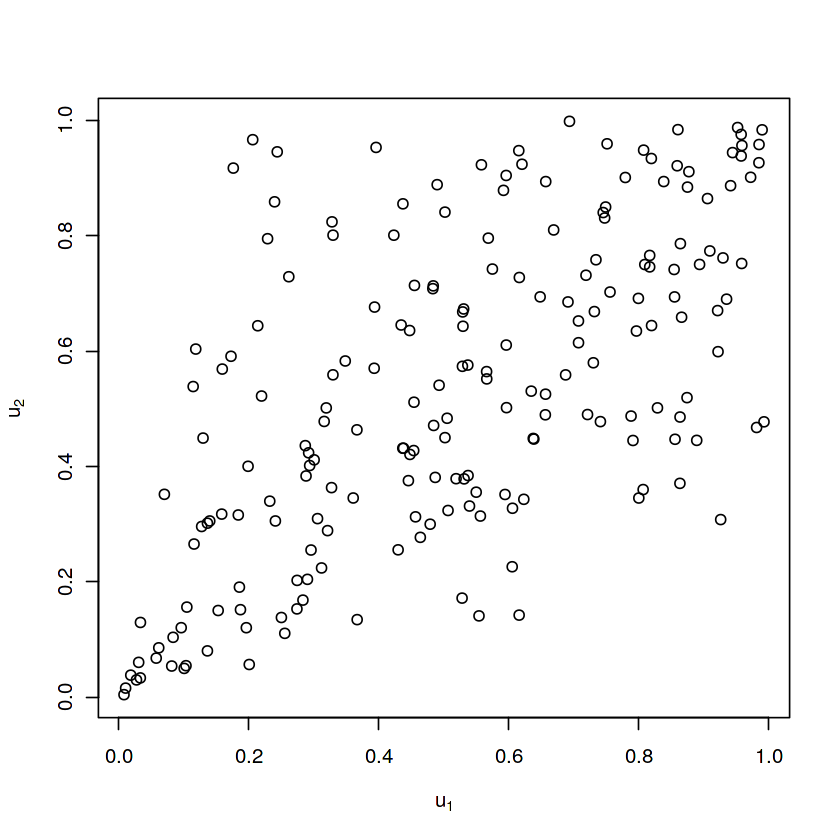

In [9]:
U <- rCopula(n = 200, copula=archmCopula(family="clayton", param = 2))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

$\theta = 4$

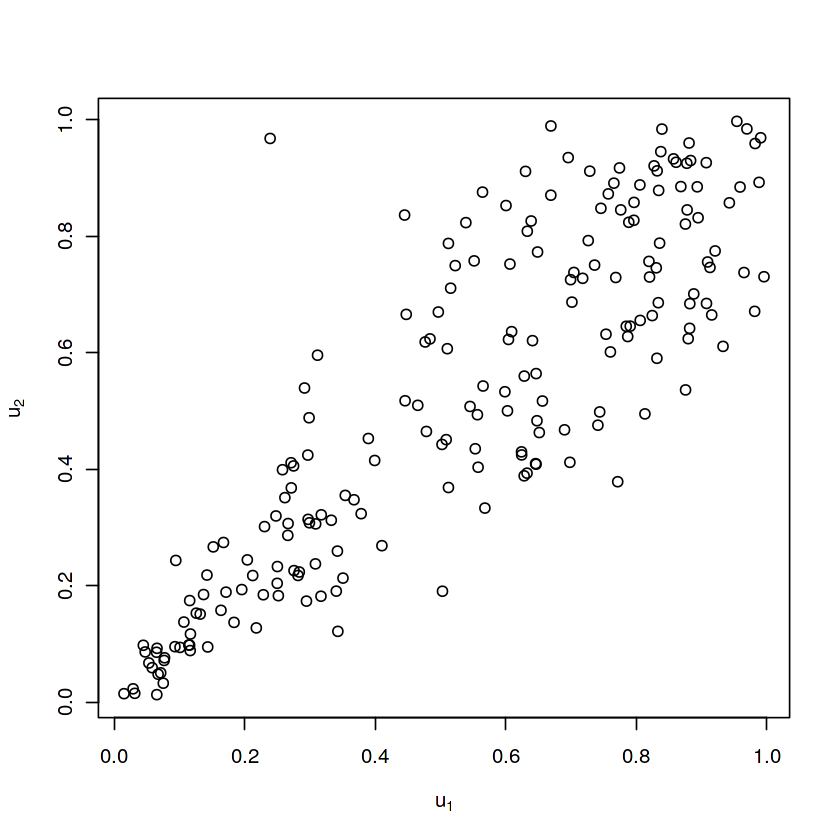

In [10]:
U <- rCopula(n = 200, copula=archmCopula(family="clayton", param = 4))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

As we increase the $\theta$ from 2 to 4, we can clearly see the increase in lower tail dependency. However, there is no obvious change in upper tail dependency.

This is not an elliptical distribution like the normal or t-copulas.

**Type of Assets for Clayton Copula:**

This would be a copula that would describe the dependency between two assets where they tend to be highly correlated when returns are low but much less correlated when returns are high.

<p style="text-align:center"> $\begin{cases}
  \text{High correlation}, \text{when returns are low}\\      
  \text{Low Correlation}, \text{when returns are high}\\
\end{cases}$ </p>

**As $\theta$ grows very large:**

The distribution collapses to the positive diagonal, i.e. $u_1$ and $u_2$ are essentially the same random variable.

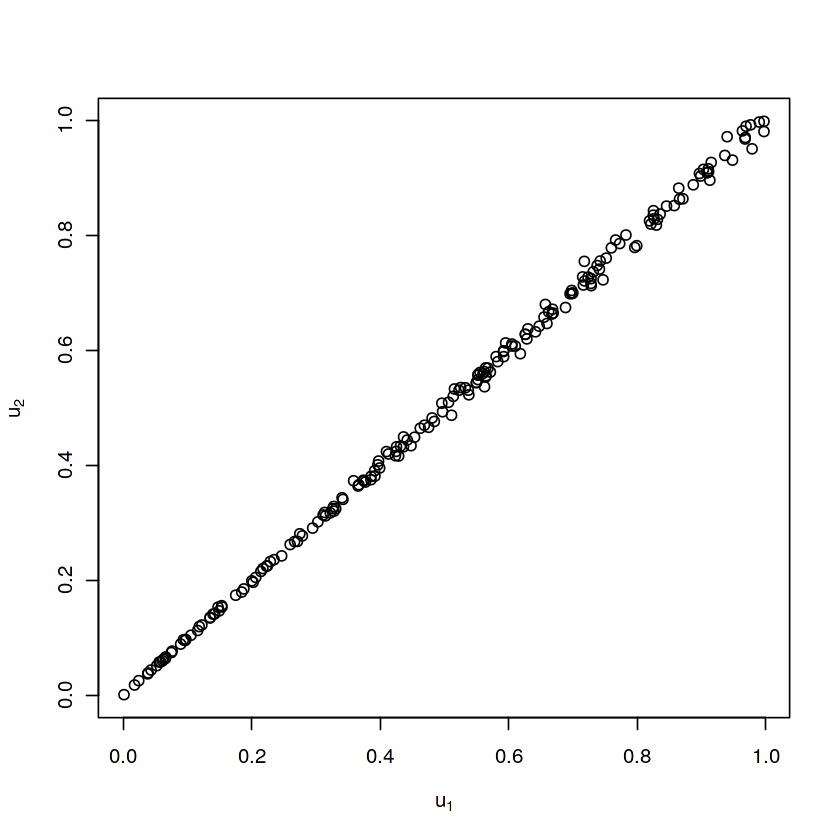

In [4]:
U <- rCopula(n = 200, copula = archmCopula(family="clayton", param = 100 ))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

## 4. Gumbel Copula

Effect of increasing the parameter $\theta$ from 2 to 4.

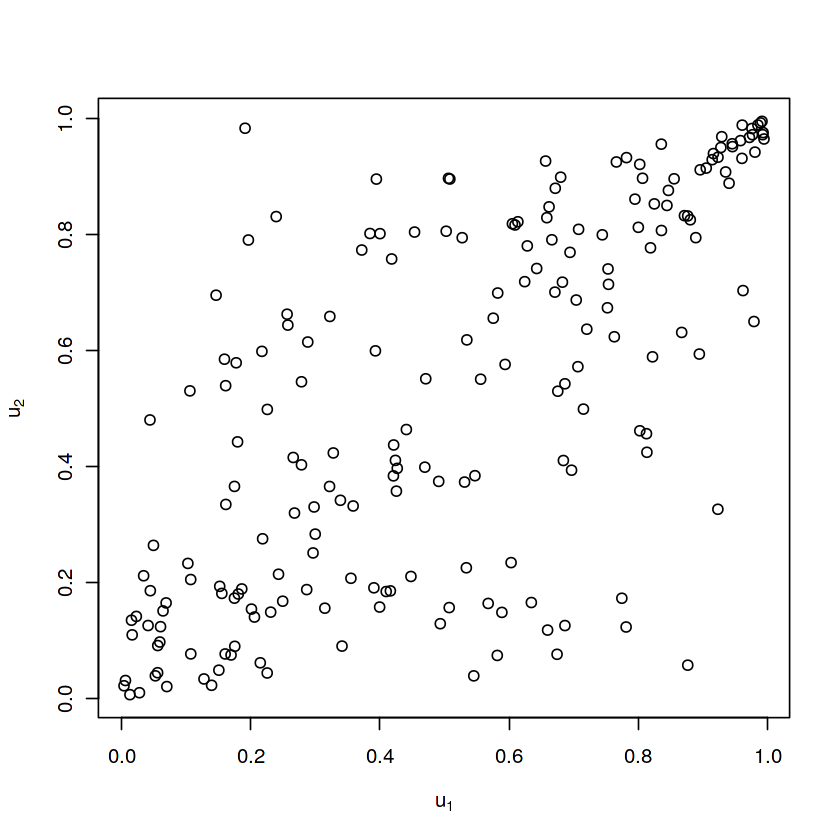

In [5]:
U <- rCopula(n = 200, copula = archmCopula(family="gumbel", param =2))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

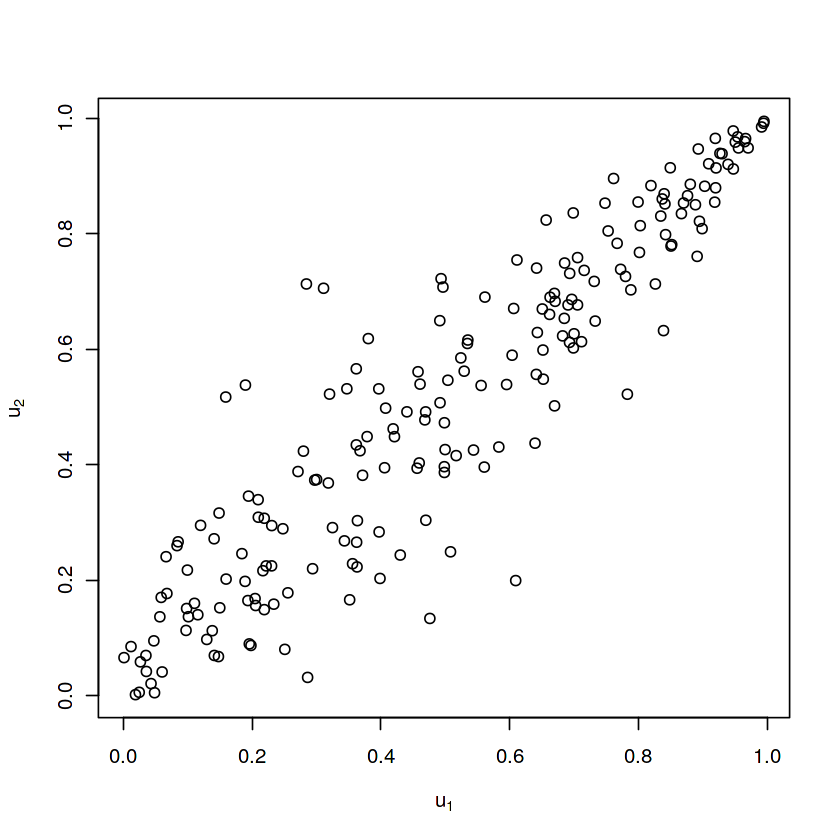

In [7]:
U <- rCopula(n = 200, copula = archmCopula(family="gumbel", param =4))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

We can see the increase in the *upper* tail dependency with much slower increase in lower tail dependency.

Not an elliptical distribution like normal or t-copulas.

**Type of Assets for Gumbel Copula:**

This would be a copula that would describe the dependency between two assets where they tend to be highly correlated when returns are high but much less correlated when returns are low.

<p style="text-align:center"> $\begin{cases}
  \text{High correlation}, \text{when returns are high}\\      
  \text{Low Correlation}, \text{when returns are low}\\
\end{cases}$ </p>

**As $\theta$ grows very large:**

The distribution collapses to the positive diagonal, i.e. $u_1$ and $u_2$ are essentially the same random variable, which is an example of **Co-Monotonicity**.

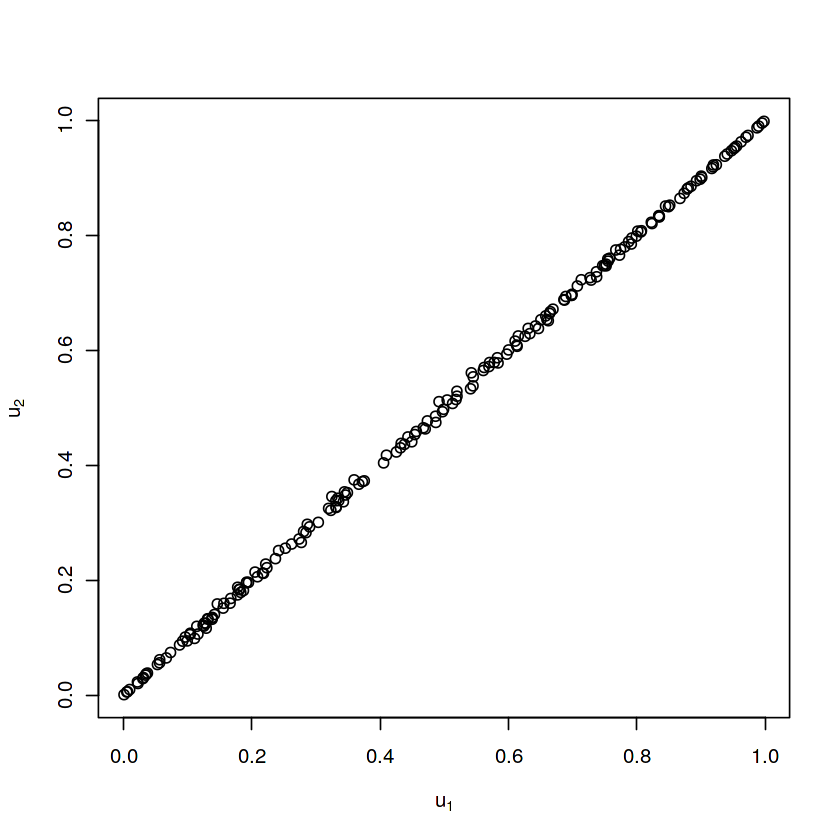

In [9]:
U <- rCopula(n = 200, copula = archmCopula(family="gumbel", param = 100))
plot(U, xlab = expression(u[1]), ylab = expression(u[2]))

##  Correlated Random Variables

Copulas can be used for the simulation of loss distribution of credit portfolios.

**Steps:**

1. Simulate a pair of correlated random variables using a Gaussian Copula (We initially indicate the correlation).

2. Simulate a pair of correlated random variables using a t-copula (We initially indicate the correlation).

3. Estimate th Gaussian copula parameter using the Maximum Likelihood Estimation.

*We can use historical datasets instead of simulated data.

Call: fitCopula(copula, data = data, method = "ml")
Fit based on "maximum likelihood" and 400 2-dimensional observations.
Copula: normalCopula 
 rho.1 
0.5966 
The maximized loglikelihood is 89.35 
Optimization converged

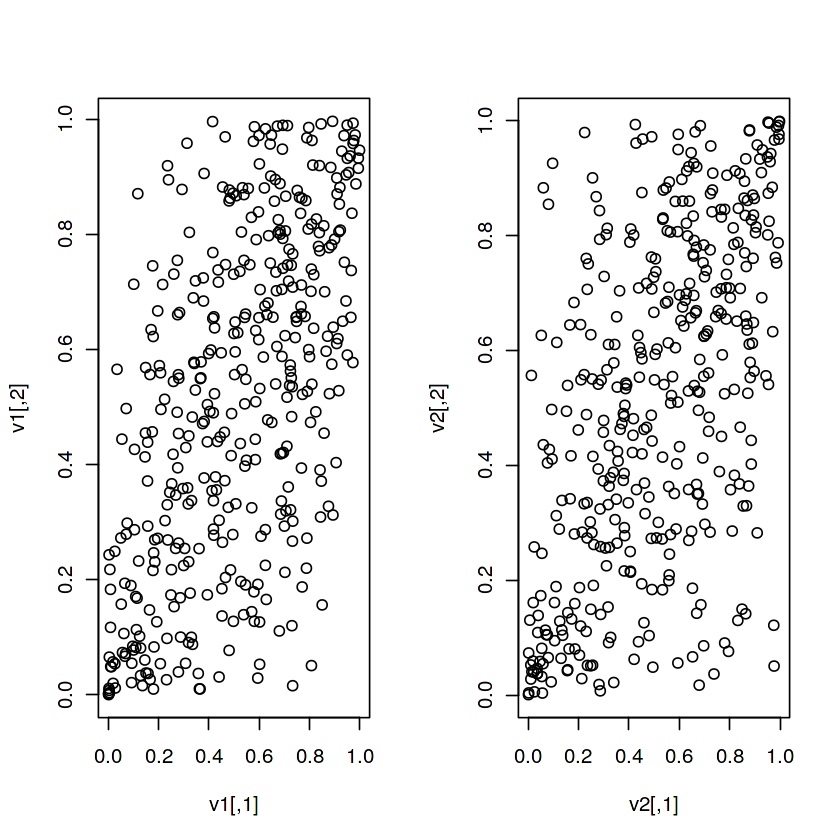

In [6]:
# load copula package in R software

library(copula)

# Declare a Gaussian copula class with 0.63 correlation

normal_Copula <- normalCopula(0.63)

# Indicate seed for generating pseudo-random numbers

set.seed(100)

# Generate 400 realizations of two uniformly distributed random
# variables with the Gaussian Copula dependency structure

v1 <- rCopula(400, normal_copula)

# Declare a t-copula with a 0.63 correlation and 4 DOF

t.copula <- tCopula(0.63, df = 4)

# set seed at 100 as previously done

set.seed(100)

# Generate 400 realizations of pairs of random variables with t-copula
# dependence

v2 <- rCopula(400, t.copula)

# The two plots will be next to each other

par(mfcol = c(1,2))
plot(v1)
plot(v2)

# Estimate the Gaussian copula parameter using MLE

fit.ml <- fitCopula(normal_copula, v1, method = "ml")
fit.ml

### Case with $\rho = 0.75$ and $n = 600$

Call: fitCopula(copula, data = data, method = "ml")
Fit based on "maximum likelihood" and 600 2-dimensional observations.
Copula: normalCopula 
 rho.1 
0.7649 
The maximized loglikelihood is 268.4 
Optimization converged

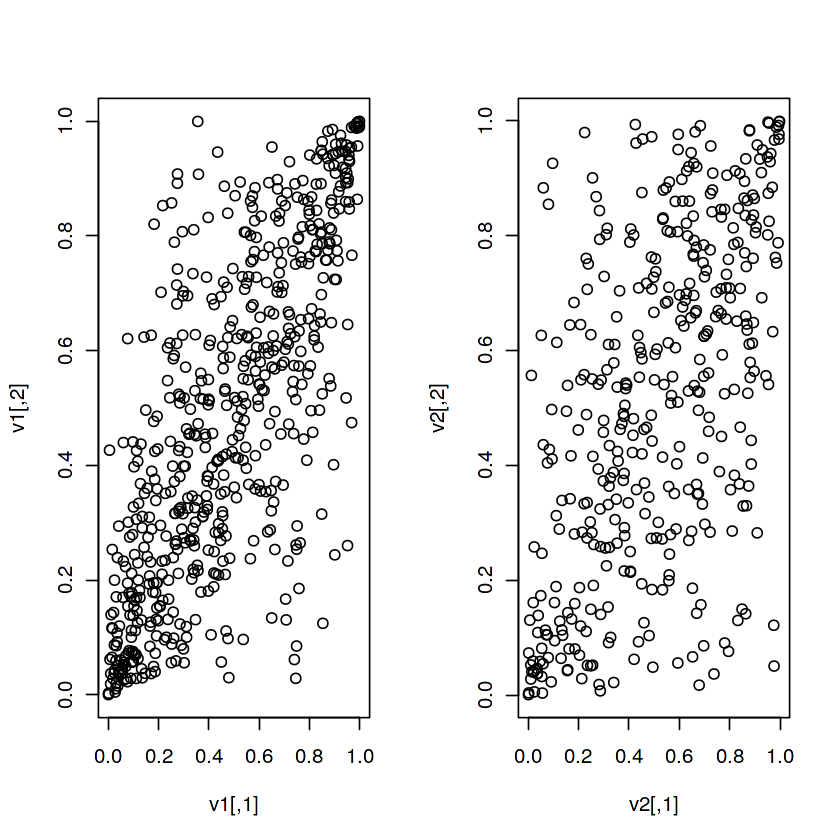

In [7]:
set.seed(110)
normal_copula <- normalCopula(0.75)
v1 <- rCopula(n = 600, normal_copula)
set.seed(110)
t.copula <- tCopula(0.75, df = 4)
v1 <- rCopula(600, t.copula)
par(mfcol=c(1,2))
plot(v1)
plot(v2)
fit.ml <- fitCopula(normal_copula, v1, method = "ml")
fit.ml